In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from distribution_calc import DistributionProbabilityCalculator

### Примеры использования реализованного мной класса DistributionProbabilityCalculator

Оценка числа пользователей, которые откроют рекламное письмо из рассылки на 5000 человек, если вероятность открытия письма равна 0.1

In [2]:
DistributionProbabilityCalculator('binom', n=5000, p=0.1).ppf_range(q_central_interval=0.9)

(465.0, 535.0)

Оценка числа посетителей на веб-сайте в течение минуты, если в среднем за минуту сайт посещают 30 человек

In [3]:
DistributionProbabilityCalculator('poisson', mu=30).ppf_range(q_central_interval=0.99)

(17.0, 45.0)

Оценка числа показов рекламы до первого клика, если вероятность клика по рекламе равна 0.01

In [4]:
DistributionProbabilityCalculator('geom', p=0.01).ppf_range(q_top=0.9, q_bottom=0)

(0.0, 230.0)

Оценка вероятности получить определённую комбинацию карт в покере, вытянув 5 карт из 52, где 4 карты являются тузами

In [5]:
DistributionProbabilityCalculator('hypergeom', M=52, n=4, N=5).pmf_cdf_rangepmf(value=4)

1.8468926031967037e-05

Оценка числа дефектовых деталей в выборке из 20 изделий из партии 200, если 15 изделий дефектные

In [6]:
DistributionProbabilityCalculator('hypergeom', M=200, n=15, N=20).ppf_range(q_central_interval=0.99)

(0.0, 5.0)

Вероятность, что до получения 2 успешных (вероятность успеха каждой инвестиции 0.3) инвестиций будет максимум 3 неуспешные

In [7]:
DistributionProbabilityCalculator('nbinom', n=2, p=0.3).pmf_cdf_rangepmf(value=3, value_bottom=0)

0.47178

Вероятность положительной доходности акций, где средняя месячная доходность составляет 1%, а стандартное отклонение 5%

In [8]:
DistributionProbabilityCalculator('norm', loc=1, scale=5).pmf_cdf_rangepmf(value=100, value_bottom=0)

0.579259709439103

Анализ веса продукции, где средний вес равен 500 г, а стандартное отклонение 20 г

In [9]:
DistributionProbabilityCalculator('norm', loc=500, scale=20).ppf_range(q_central_interval=0.99)

(448.483413929022, 551.5165860709781)

Оценка времени до следующего звонка, если среднее время между звонками составляет 2 минуты

In [10]:
DistributionProbabilityCalculator('expon', scale=120).ppf_range(q_central_interval=0.95)

(3.0381369581147877, 442.6655344936722)

______________

Доходы населения обычно распределены логнормально. Допустим, у нас есть выборка по доходам по всей России. Вычислим на их основе какой интервал соответствует 99% срединному интервалу (то есть 99% людей получают доход в этом диапазоне):

In [132]:
from scipy.stats import lognorm
x = [90_000, 75_000, 92_000, 55_000, 63_000, 110_000, 135_000, 165_000, 80_000, 38_000, 190_000, 100_000, 65_000, 70_000, 30_000, 50_000, 58_000, 74_000, 85_000, 40_000, 51_000, 76_000]
shape_x, loc_x, scale_x = lognorm.fit(x,floc=0)
DistributionProbabilityCalculator('lognorm', s=shape_x, scale=scale_x).ppf_range(q_central_interval=0.99)

(23330.029742781542, 232137.0590647685)

Какова на основе нашей выборки вероятность получать 100 000 рублей/мес и меньше:

In [133]:
DistributionProbabilityCalculator('lognorm', s=shape_x, scale=scale_x).pmf_cdf_rangepmf(value=100_000)

0.7541285872386324

____________

Анализ получения сердечной недостаточности

In [19]:
heart_failure = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure.age

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

Я взял столбец с возрастом из датасета по сердечной недостаточности.

Теперь на основе этих данных нужно оценить параметры формы и масштаба распределения Вейбулла

In [377]:
# Оценка параметров формы распределения и масштаба на основе данных
shape_k, loc, scale_lambda = stats.weibull_min.fit(heart_failure.age, floc=0)

shape_k, scale_lambda

(5.364879614184597, 65.77945218296341)

Возрастной интвервал, соответствующий 90% срединному интервалу (то есть 90% значений находятся в этом диапазоне):

In [38]:
DistributionProbabilityCalculator('weibull_min', c=shape_k, scale=scale_lambda).ppf_range(q_central_interval=0.9)

(37.81366804080421, 80.70662880592819)

Вероятность получить сердечную недостаточность в возрасте 5-45 лет относительно других возрастов:

In [42]:
DistributionProbabilityCalculator('weibull_min', c=shape_k, scale=scale_lambda).pmf_cdf_rangepmf(value=45, value_bottom=5)

0.12230039808189401

___________

### Сравнение среднего балла двух групп студентов по выборкам из 15 человек. 

In [155]:
group1 = np.array([85, 90, 78, 88, 92, 80, 83, 87, 91, 84, 89, 79, 86, 82, 93])
group2 = np.array([95, 80, 73, 78, 82, 72, 77, 99, 51, 79, 83, 74, 78, 93, 84])

# Вычисление средних значений и стандартных отклонений
mean1, mean2 = np.mean(group1), np.mean(group2)
std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)

print(f"Средний балл группы 1: {mean1.round(1)}")
print(f"Средний балл группы 2: {mean2.round(1)}")
print(f"Стандартное отклонение группы 1: {std1.round(1)}")
print(f"Стандартное отклонение группы 2: {std2.round(1)}")

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Между средними баллами групп есть статистически значимая разница.")
else:
    print("Нет статистически значимой разницы между средними баллами групп.")

Средний балл группы 1: 85.8
Средний балл группы 2: 79.9
Стандартное отклонение группы 1: 4.8
Стандартное отклонение группы 2: 11.3
t-статистика: 1.8717741533050054
p-значение: 0.07686120750426087
Нет статистически значимой разницы между средними баллами групп.


Хоть и средние значения групп на первый взгляд значительно отличаются, значения во второй группе 2 разбросаны намного сильнее (стандартное отклонение в ~2.5 раза больше, чем в группе 1), чем значения в группе 1. Поэтому проведя t-тест, нам не удается сделать вывод о том, что средние значения в генеральной совокупности этих выборок отличаются. 

___________________

### Пример использования реализованного мной класса TestDataGenerator

In [3]:
from create_test_data import TestDataGenerator
df = pd.DataFrame({'id': range(1, 11)})

test_data_generator = TestDataGenerator(df)
test_data_generator.add_categorical_column('Категории', ['A', 'B', 'C'], [0.1,0.3,0.6])
test_data_generator.add_discrete_column('Равномерное распределение', 'uniform', 1, 10)
test_data_generator.add_discrete_column('Распределение Пуассона', 'poisson', 5)
test_data_generator.add_discrete_column('Биномиальное распределение', 'binomial', 10, 0.5)
test_data_generator.add_discrete_column('Негативное биномиальное распределение', 'negative_binomial', 10, 0.5)
test_data_generator.add_discrete_column('Геометрическое', 'geometric', 0.5)
test_data_generator.add_discrete_column('Гипергеометрическое', 'hypergeometric', 10, 5, 3)
test_data_generator.add_continuous_column('Нормальное', 'normal', 0, 1)
test_data_generator.add_continuous_column('Непрерывное равномерное', 'uniform', 0, 1)
test_data_generator.add_continuous_column('Экспоненциальное', 'exponential', 1.0)
test_data_generator.add_continuous_column('Логнормальное', 'lognormal', 0, 1)
test_data_generator.add_date_time_column('Дата и время', 'datetime', '2020-01-01', '2022-12-31')
test_data_generator.add_date_time_column('Дата', 'date', '2020-01-01', '2022-12-31')
test_data_generator.add_date_time_column('Время', 'time')
test_data_generator.add_string_column('Текст', 5)
test_data_generator.add_boolean_column('True и False', true_probability=0.7)
test_data_generator.add_uuid_column('Идентификатор uuid')

df

,id,Категории,Равномерное распределение,Распределение Пуассона,Биномиальное распределение,Негативное биномиальное распределение,Геометрическое,Гипергеометрическое,Нормальное,Непрерывное равномерное,Экспоненциальное,Логнормальное,Дата и время,Дата,Время,Текст,True и False,Идентификатор uuid
0,1,C,4,6,4,6,3,3,-1.244836,0.159802,1.197681,0.689684,2022-06-21 11:49:41,2020-08-19,23:52:14,ьсвзн,False,398f6393-a3cb-47ce-8767-8be0209a84c0
1,2,C,7,7,5,8,1,3,0.933837,0.357095,0.122080,1.496423,2020-10-21 01:48:13,2021-07-23,10:38:46,бдыяъ,False,2618dfd4-b4b6-4f1a-aa18-230bebdff51d
2,3,C,2,7,8,13,1,1,0.195857,0.049175,1.468499,0.892474,2020-01-03 00:18:30,2021-12-05,03:50:52,цжуез,True,6e6d959a-def3-4025-ad18-45d9e7bd279b
3,4,C,5,8,7,14,4,1,0.929232,0.514562,0.089945,0.195304,2021-06-16 12:16:49,2022-08-02,14:50:34,ьутхк,True,2c530c27-eb5c-4a3e-9898-5978e59ce74d
4,5,C,6,4,10,10,4,2,-1.715478,0.220435,0.639490,0.752977,2021-04-13 22:54:25,2021-10-08,07:55:12,п ькл,True,932815d2-411a-4d8c-8f67-9ea28848321c
5,6,B,2,3,5,5,3,2,0.937371,0.378123,0.666771,0.283946,2020-07-23 11:29:25,2020-08-05,04:52:07,оэчме,True,4cac9fa7-153e-4e05-8ffa-e2913169bf99
6,7,C,9,1,6,5,1,2,0.092121,0.331708,0.843854,2.708716,2020-09-18 22:19:31,2020-05-27,15:42:41,шююэй,True,7a93dba0-d3fc-4a07-b388-71284f9601c1
7,8,C,1,8,6,16,1,2,0.803917,0.396176,0.536456,1.350349,2020-10-29 13:35:55,2022-02-13,04:33:08,ввюу,False,3c151499-f3ff-42df-b845-00f225772aeb
8,9,C,1,4,5,5,4,3,0.282060,0.691202,0.974204,1.012566,2021-07-04 08:04:39,2021-12-31,16:26:51,дрпух,True,034ca6f3-5248-4016-826e-94949be51059
9,10,B,5,4,7,11,1,3,-1.695605,0.179520,0.261169,0.181941,2021-01-27 12:52:21,2021-08-26,03:08:16,эйсое,True,dbe37b99-ffc6-4ea2-aebe-28c7113b907e


_____________

### Исследовательский анализ крушений самолетов за 1908-2009 года

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns
air_crashes = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

- index: the index of the row
- Date: the date of the incident
- Time: the time of the incident
- Location: the location of the incident
- Operator: the operator of the aircraft
- Flight #: the flight number of the aircraft
- Route: the route of the aircraft
- Type: the type of aircraft
- Registration: the registration of the aircraft
- cn/In: the construction number/serial number of the aircraft
- Aboard: the number of people on board the aircraft
- Fatalities: the number of fatalities in the incident
- Ground: the number of people on the ground killed in the incident
- Summary: a summary of the incident

In [271]:
air_crashes

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


Отбросим военные самолеты, затем отфильтруем по количеству погибших (установим более 1 человека)

In [335]:
air_crashes_without_army = air_crashes[~(air_crashes['Operator'].str.contains('army|militar|nav|force|Marines|Guard|Defense|Fleet|Fighter|Bomber', case=False, na=False)|air_crashes['Summary']
                                         .str.contains('army|military|navy|air force|Marines|Fleet|Fighter|Bomber', case=False, na=False))]
filtered_df = air_crashes_without_army[(air_crashes_without_army['Fatalities']>=1)]
filtered_df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
21,12/16/1918,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,1.0,0.0,NaN
22,05/25/1919,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...
23,07/19/1919,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,1.0,0.0,NaN
24,10/02/1919,NaN,"Newcastle, England",Aircraft Transport and Travel,NaN,NaN,De Havilland DH-4,NaN,NaN,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,04/17/2009,15:32,"Canaima National Park, Venezuela",Aerotuy airline,NaN,Canaima - Porlamar,Cessna 208B Grand Caravan,YV-1181,208B-0695,11.0,1.0,0.0,"The plane, carrying 9 tourists, crashed 5 mile..."
5261,04/29/2009,06:00,"Massamba, DemocratiRepubliof Congo",Bako Air,NaN,"Bangui, CAR- Brazzaville, Congo - Harare, Zimb...",Boeing B-737-200,TL-ADM,22264/753,7.0,7.0,0.0,Crashed while en route on a ferrying flight. T...
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...


In [336]:
filtered_df = filtered_df.reset_index(drop=True)

In [337]:
filtered_df.loc[:, 'Год'] = pd.to_datetime(filtered_df['Date']).dt.year

In [338]:
filtered_df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Год
0,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
1,12/16/1918,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,1.0,0.0,NaN,1918
2,05/25/1919,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,1919
3,07/19/1919,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,1.0,0.0,NaN,1919
4,10/02/1919,NaN,"Newcastle, England",Aircraft Transport and Travel,NaN,NaN,De Havilland DH-4,NaN,NaN,1.0,1.0,0.0,NaN,1919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,04/17/2009,15:32,"Canaima National Park, Venezuela",Aerotuy airline,NaN,Canaima - Porlamar,Cessna 208B Grand Caravan,YV-1181,208B-0695,11.0,1.0,0.0,"The plane, carrying 9 tourists, crashed 5 mile...",2009
4318,04/29/2009,06:00,"Massamba, DemocratiRepubliof Congo",Bako Air,NaN,"Bangui, CAR- Brazzaville, Congo - Harare, Zimb...",Boeing B-737-200,TL-ADM,22264/753,7.0,7.0,0.0,Crashed while en route on a ferrying flight. T...,2009
4319,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,2009
4320,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009


In [339]:
bins = range(1920, 2020, 10)
labels = [f'{start}-{start+9}' for start in bins[:-1]]
filtered_df.loc[:,'Десятилетие'] = pd.cut(filtered_df['Год'], bins=bins, labels=labels, right=False)

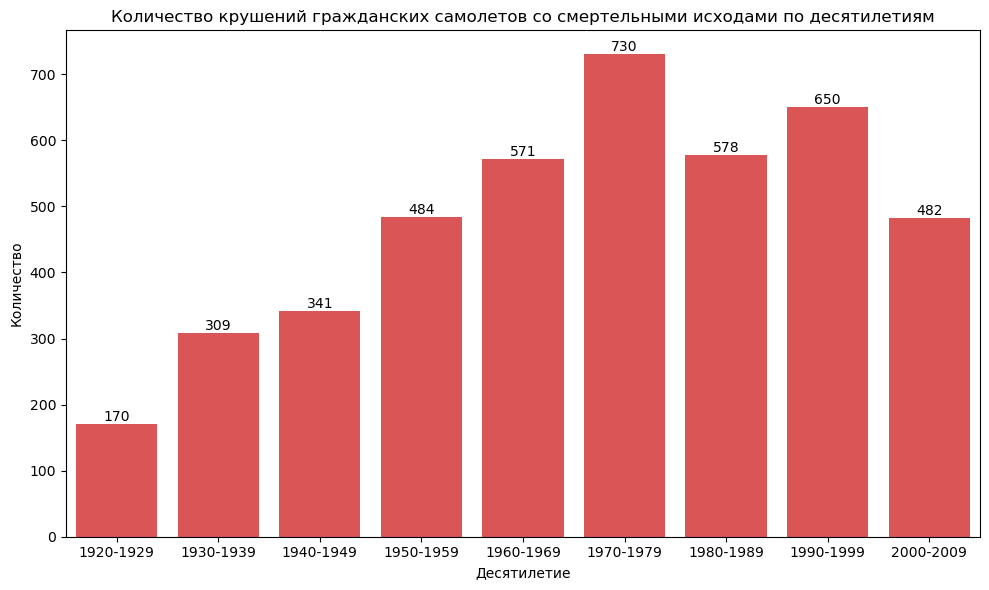

In [379]:
decade_counts = filtered_df['Десятилетие'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=decade_counts.index, y=decade_counts.values, color='#F04040')
ax.bar_label(ax.containers[0])

plt.xlabel('Десятилетие')
plt.ylabel('Количество')
plt.title('Количество крушений гражданских самолетов со смертельными исходами по десятилетиям')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

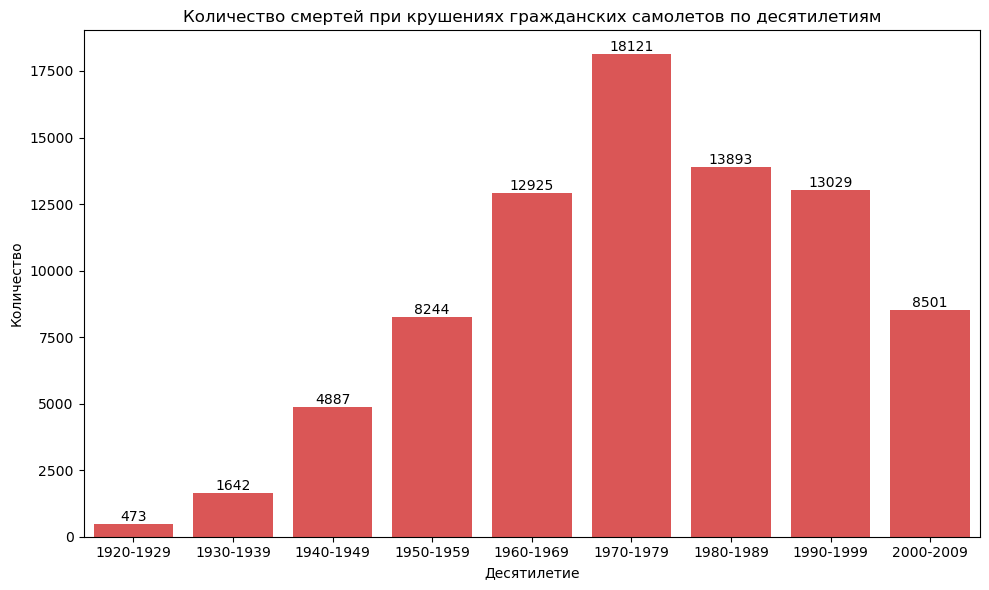

In [341]:
decade_deaths = filtered_df.groupby('Десятилетие', observed=True)['Fatalities'].sum()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=decade_deaths.index, y=decade_deaths.values, color='#F04040')
ax.bar_label(ax.containers[0])

plt.xlabel('Десятилетие')
plt.ylabel('Количество')
plt.title('Количество смертей при крушениях гражданских самолетов по десятилетиям')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [342]:
print(f'Общее количество погибших при крушениях самолетов за 1920-2009 года: {filtered_df.Fatalities.astype(int).sum()} человек')

Общее количество погибших при крушениях самолетов за 1920-2009 года: 81722 человек


Видна положительная динамика